<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Подгрузка-библиотек-и-датасета" data-toc-modified-id="Подгрузка-библиотек-и-датасета-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подгрузка библиотек и датасета</a></span></li><li><span><a href="#Основная-информация" data-toc-modified-id="Основная-информация-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Основная информация</a></span></li><li><span><a href="#Исследование-пропусков" data-toc-modified-id="Исследование-пропусков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Исследование пропусков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Подготовка-выборки" data-toc-modified-id="Подготовка-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка выборки</a></span></li><li><span><a href="#Сравнение-моделей-построенных-без-учета-дисбалланса" data-toc-modified-id="Сравнение-моделей-построенных-без-учета-дисбалланса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение моделей построенных без учета дисбалланса</a></span><ul class="toc-item"><li><span><a href="#Линейная-модель" data-toc-modified-id="Линейная-модель-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Линейная модель</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Модель случайного леса</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Балансирование" data-toc-modified-id="Балансирование-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Балансирование</a></span></li><li><span><a href="#upsampling" data-toc-modified-id="upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>upsampling</a></span></li><li><span><a href="#downsampling" data-toc-modified-id="downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>downsampling</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Сравнение-с-случайной-моделью-и-константной" data-toc-modified-id="Сравнение-с-случайной-моделью-и-константной-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Сравнение с случайной моделью и константной</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Необходимо построить модель с предельно большим значением *F1*-меры.

Дополнительно необходимо измерять *AUC-ROC*, и сравнивать её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Подгрузка библиотек и датасета

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import phik
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve,roc_curve, plot_roc_curve
 
from sklearn.metrics import precision_recall_curve, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/datasets/Churn.csv')

### Основная информация 

In [4]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата
* Exited — факт ухода клиента

В данных имеются 3 точно не влияющих на предсказание моделей признака - RowNumber, CustomerId, Surname.
Также имеются 7 колличестввенных и 2 категориальных признака(их нужно будет перекодировать), которые потенциально полезны для моделей

In [6]:
df.columns = ['row_number', 'customer_id', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_crcard',
       'isactive_member', 'estimated_salary', 'exited']

In [7]:
df.columns

Index(['row_number', 'customer_id', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_crcard',
       'isactive_member', 'estimated_salary', 'exited'],
      dtype='object')

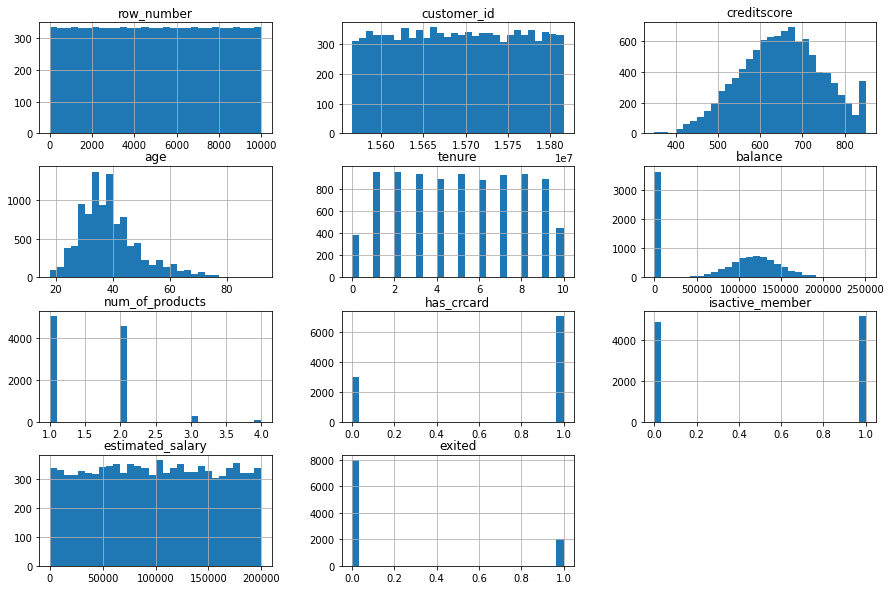

In [8]:
df.hist(figsize=(15,10), bins=30);

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
row_number,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
creditscore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
num_of_products,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
has_crcard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
isactive_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Данные в целом распределены логично, кроме предполагаемой зарплаты. Странно что тут не колокол, это означает что данные подготовили так, чтобы были примерно одинакого представленны разные зарплатные катерогии граждан. Также стоит отметить, что большое число клиентов (~25%) имеют 0 на счете

<AxesSubplot:>

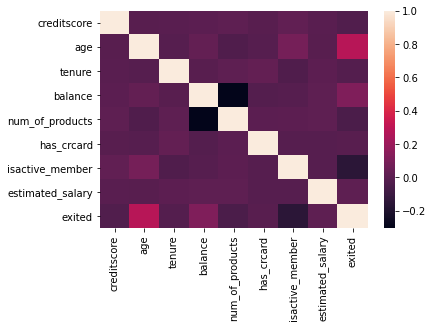

In [10]:
sns.heatmap(df.drop(columns=['row_number', 'customer_id']).corr())

interval columns not set, guessing: ['creditscore', 'age', 'tenure', 'balance', 'num_of_products', 'has_crcard', 'isactive_member', 'estimated_salary', 'exited']


<AxesSubplot:>

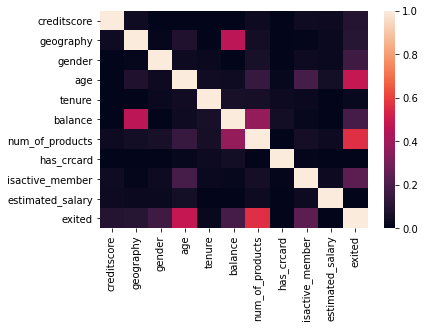

In [11]:
sns.heatmap(df.drop(columns=['row_number', 'customer_id', 'surname']).phik_matrix())

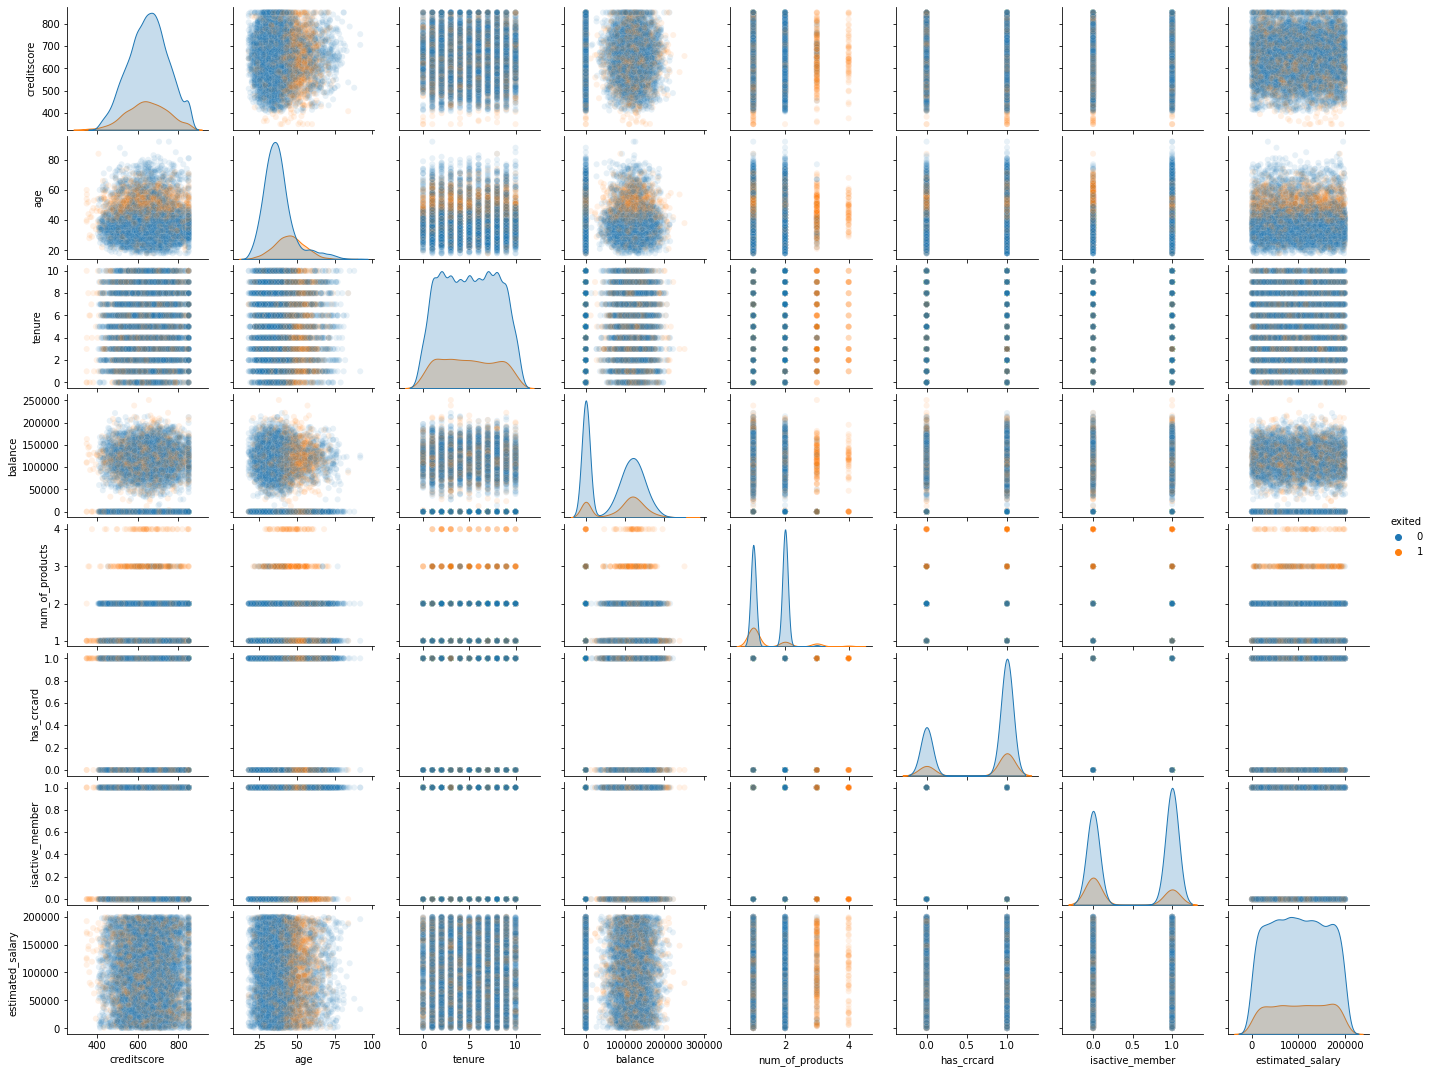

In [12]:
sns.pairplot(df.drop(columns=['row_number', 'customer_id', 'surname']), 
             hue='exited', plot_kws={'alpha':0.1})
plt.gcf().set_size_inches(20,15);

Выделяется категория граждан 45-60, которые уходят чаще. Также, стреди обладателей 3-4 услуг банков, доля ушедших тоже выше

In [13]:
df.duplicated().sum()

0

In [14]:
df['customer_id'].duplicated().sum()

0

По данным дубликатов и аномалий не замечено, кроме пропусков в столбце `tenure`, их исследование будет проведено далее

In [15]:
print('Процент объектов с полижительным целевым признаком: {:.2%}'.format(df['exited'].mean()))

Процент объектов с полижительным целевым признаком: 20.37%


Замечен небольшой дисбаланс классов, учтем это при исследовании модели

### Исследование пропусков

In [16]:
df_space_check = df.fillna(-1)

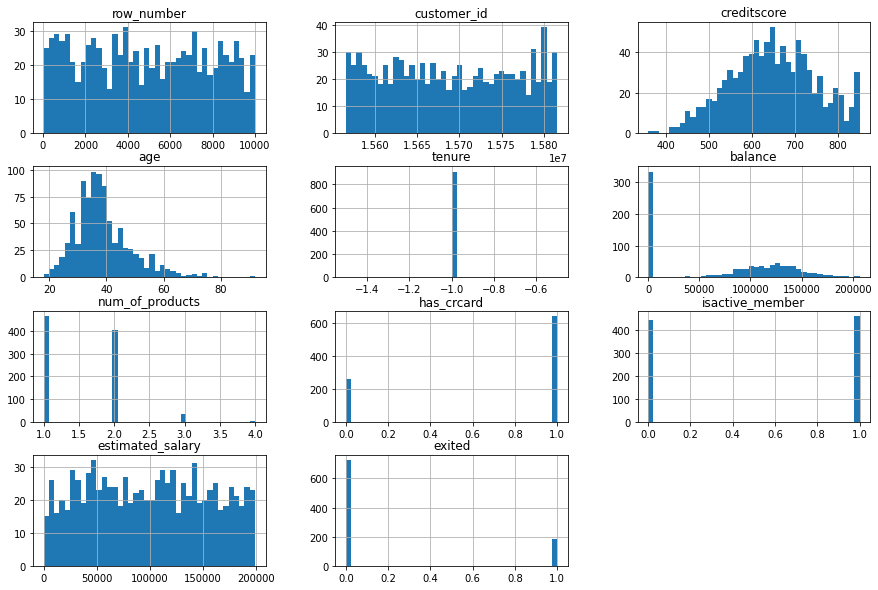

In [17]:
df_space_check.query('tenure == -1').hist(figsize=(15,10), bins=40);

In [18]:
print('Процент объектов с полижительным целевым признаком для известного tenure : {:.2%}'.format(
    df_space_check.query('tenure != -1')['exited'].mean()))
print('Процент объектов с полижительным целевым признаком для неизвестного tenure : {:.2%}'.format(
    df_space_check.query('tenure == -1')['exited'].mean()))

Процент объектов с полижительным целевым признаком для известного tenure : 20.39%
Процент объектов с полижительным целевым признаком для неизвестного tenure : 20.13%


In [19]:
#df.dropna(inplace=True)
df.fillna(-1, inplace=True)

Пропуски в данных скорее всего носят случайный характер. Заполним пропущенные значения -1, это ухудшит параметры линейной модели и даст приемущество деревянным

###  Вывод 
* Исследован датесет
* Названия колонок приведены к змеиному регистру
* Обнаружен небольшой дисбалланс классов(20/80)
* Дубликаты не найдены
* Пропущенные значения `tenure`, которые, скорее всего, носят случайный характер заполнены заглушкой -1

## Исследование задачи

### Подготовка выборки

In [20]:
df.drop(columns=['row_number', 'customer_id', 'surname'], inplace=True)

Колонки с номером и id клиента, а также его фамилией очевидно не влияют на его уход - отбросим

In [21]:
gender_ohe = pd.get_dummies(df["gender"], drop_first=True)
country_ohe = pd.get_dummies(df["geography"], drop_first=True)


df = pd.concat([
    df.drop(["gender", "geography"], axis=1),
    gender_ohe,
    country_ohe], axis=1)
df.head()

,creditscore,age,tenure,balance,num_of_products,has_crcard,isactive_member,estimated_salary,exited,Male,Germany,Spain
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1


Выполнена кодировка категориальных признаком OHE

In [22]:
X_train_all, x_test, y_train_all, y_test = train_test_split(df.drop(columns=['exited']), df['exited'], test_size=0.20, random_state=42)
X_train, x_valid, y_train, y_valid = train_test_split(X_train_all, y_train_all, test_size=0.25, random_state=42)


In [23]:
print(y_train.shape, y_valid.shape, y_test.shape)

(6000,) (2000,) (2000,)


Выборка разбита на тренировочную, валидациионную и тестовую в соотношении 3:1:1

In [24]:
numeric = ['creditscore', 'age', 'balance', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(X_train[numeric])

X_train[numeric] = scaler.transform(X_train[numeric])
x_test[numeric] = scaler.transform(x_test[numeric])
x_valid[numeric] = scaler.transform(x_valid[numeric])

Численные признаки приведены к нормальному виду

### Сравнение моделей построенных без учета дисбалланса

#### Линейная модель

In [25]:
grid = {
    'intercept_scaling': [0.5, 1.0, 1.5],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}
model = LogisticRegression(random_state=42)

grid_search = GridSearchCV(model, grid, cv=5,
                           scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'intercept_scaling': [0.5, 1.0, 1.5]},
             scoring='f1')

In [26]:
grid_search.best_params_

{'C': 1, 'intercept_scaling': 0.5}

In [27]:
model_lin = LogisticRegression(random_state=42, C=1, intercept_scaling=0.5)
model_lin.fit(X_train, y_train)
y_pred = model_lin.predict(x_valid)
print("F1:", f1_score(y_valid, y_pred))

F1: 0.3090909090909091


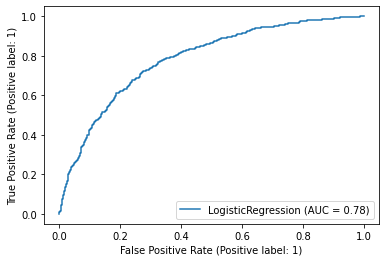

In [28]:
plot_roc_curve(model_lin, x_valid, y_valid)

In [29]:
print("roc_auc:", roc_auc_score(y_valid, y_pred))

roc_auc: 0.5865224562158335


Как и ожидалось, roc_auc для логистической регрессии не будет большим

#### Модель случайного леса

In [30]:
grid = {'n_estimators': [3, 10, 30, 50, 100, 150],
                     'max_depth': range(5, 11)
                    }
model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(model, grid, cv=5,
                           scoring='f1'
                          )
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': range(5, 11),
                         'n_estimators': [3, 10, 30, 50, 100, 150]},
             scoring='f1')

In [31]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 30}

In [32]:
model_fst = RandomForestClassifier(random_state=42, max_depth=10, n_estimators=30)
model_fst.fit(X_train, y_train)
y_pred = model_fst.predict(x_valid)
print("F1:", f1_score(y_valid, y_pred))

F1: 0.566510172143975


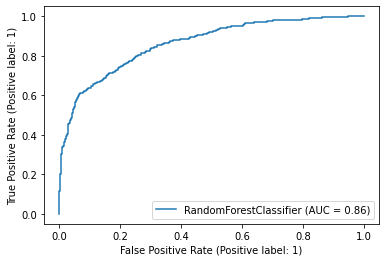

In [33]:
plot_roc_curve(model_fst, x_valid, y_valid)

In [34]:
print("roc_auc:", roc_auc_score(y_valid, y_pred))

roc_auc: 0.704950635536006


In [35]:
model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(x_valid)
print("F1:", f1_score(y_valid, y_pred))

F1: 0.5176876617773942


### Вывод
* Категориальные признаки перекодированны методом OHE
* Выборка разита на тренировочную, валидационную и тестовую 3:1:1
* Числовые признаки приведены к нормальному виду
* Обучены 2 модели - логистической регрессии и случайного леса, ни на одной моделе не достигнут целевой f1, необходимо бороться с дисбалансом

## Борьба с дисбалансом

### Балансирование 

In [36]:
grid = {
    'intercept_scaling': [0.5, 1.0, 1.5],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}
model = LogisticRegression(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(model, grid, cv=5,
                           scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'intercept_scaling': [0.5, 1.0, 1.5]},
             scoring='f1')

In [37]:
grid_search.best_params_

{'C': 0.01, 'intercept_scaling': 0.5}

In [38]:
model_lin = LogisticRegression(random_state=42, C=0.01, intercept_scaling=0.5)
model_lin.fit(X_train, y_train)
y_pred = model_lin.predict(x_valid)
print("F1:", f1_score(y_valid, y_pred))

F1: 0.192


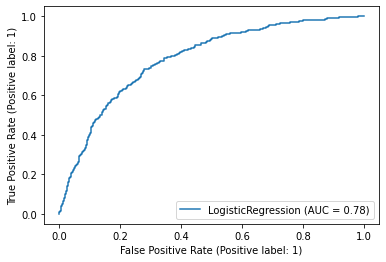

In [39]:
plot_roc_curve(model_lin, x_valid, y_valid)

In [40]:
print("roc_auc:", roc_auc_score(y_valid, y_pred))

roc_auc: 0.5458240455517057


Модель оказалась даже хуже чем без баланса

In [41]:
grid = {'n_estimators': [3, 10, 30, 50, 100, 150],
                     'max_depth': range(5, 11)
                    }
model = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(model, grid, cv=5,
                           scoring='f1'
                          )
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': range(5, 11),
                         'n_estimators': [3, 10, 30, 50, 100, 150]},
             scoring='f1')

In [42]:
grid_search.best_params_

{'max_depth': 8, 'n_estimators': 150}

In [43]:
model_fst = RandomForestClassifier(random_state=42, max_depth=8, n_estimators=150)
model_fst.fit(X_train, y_train)
y_pred = model_fst.predict(x_valid)
print("F1:", f1_score(y_valid, y_pred))

F1: 0.5750394944707741


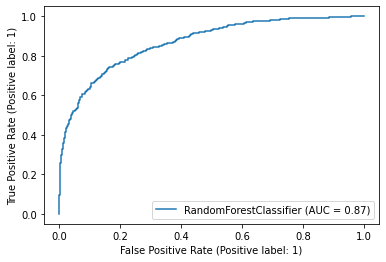

In [44]:
plot_roc_curve(model_fst, x_valid, y_valid)

In [45]:
print("roc_auc:", roc_auc_score(y_valid, y_pred))

roc_auc: 0.7083667083186483


И снова ухудшение

### upsampling

In [46]:
def upsample(x, y, repeat):
    
    x_zeros = x[y == 0]
    x_ones = x[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]
    
    x_up = pd.concat([x_zeros] + [x_ones] * repeat)
    y_up = pd.concat([y_zeros] + [y_ones] * repeat)
    
    x_up = shuffle(x_up, random_state=42)
    y_up = shuffle(y_up, random_state=42)
    
    return x_up, y_up

    
    
X_up, y_up = upsample(X_train, y_train, 4)

print(X_up.shape)
print(y_up.shape)

(9693, 11)
(9693,)


In [47]:
grid = {
    'intercept_scaling': [0.5, 1.0, 1.5],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}
model = LogisticRegression(random_state=42)

grid_search = GridSearchCV(model, grid, cv=5,
                           scoring='f1')
grid_search.fit(X_up, y_up)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'intercept_scaling': [0.5, 1.0, 1.5]},
             scoring='f1')

In [48]:
grid_search.best_params_

{'C': 0.001, 'intercept_scaling': 0.5}

In [49]:
model_lin = LogisticRegression(random_state=42, C=0.001, intercept_scaling=0.5)
model_lin.fit(X_train, y_train)
y_pred = model_lin.predict(x_valid)
print("F1:", f1_score(y_valid, y_pred))

F1: 0.009569377990430623


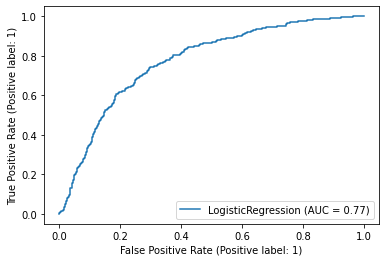

In [50]:
plot_roc_curve(model_lin, x_valid, y_valid)

In [51]:
print("roc_auc:", roc_auc_score(y_valid, y_pred))

roc_auc: 0.5014761279219323


На логистической регрессии выигрыша практически нет

In [52]:
grid = {'n_estimators': [3, 10, 30, 50, 100, 150],
                     'max_depth': range(5, 11)
                    }
model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(model, grid, cv=5,
                           scoring='f1'
                          )
grid_search.fit(X_up, y_up)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': range(5, 11),
                         'n_estimators': [3, 10, 30, 50, 100, 150]},
             scoring='f1')

In [53]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 150}

In [54]:
model_fst = RandomForestClassifier(random_state=42, max_depth=10, n_estimators=150)
model_fst.fit(X_up, y_up)
y_pred = model_fst.predict(x_valid)
print("F1:", f1_score(y_valid, y_pred))

F1: 0.6240520043336945


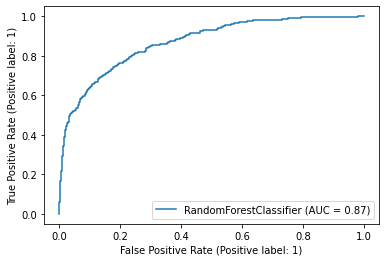

In [55]:
plot_roc_curve(model_fst, x_valid, y_valid)

In [56]:
print("roc_auc:", roc_auc_score(y_valid, y_pred))

roc_auc: 0.7787249916467179


А вот для случайного леса выигрыш большой

### downsampling

In [57]:
def downsample(x, y, fraction):
    
    x_zeros = x[y == 0]
    x_ones = x[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]
    
    x_zeros = x_zeros.sample(frac=fraction, random_state=42)
    y_zeros = y_zeros.sample(frac=fraction, random_state=42)
    
    x_down = pd.concat([x_zeros] + [x_ones])
    y_down = pd.concat([y_zeros] + [y_ones])
    
    x_down = shuffle(x_down, random_state=42)
    y_down = shuffle(y_down, random_state=42)
    
    return x_down, y_down

    
    
X_down, y_down = downsample(X_train, y_train, 0.25)

print(X_down.shape)
print(y_down.shape)

(2423, 11)
(2423,)


In [58]:
grid = {
    'intercept_scaling': [0.5, 1.0, 1.5],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}
model = LogisticRegression(random_state=42)

grid_search = GridSearchCV(model, grid, cv=5,
                           scoring='f1')
grid_search.fit(X_down, y_down)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'intercept_scaling': [0.5, 1.0, 1.5]},
             scoring='f1')

In [59]:
grid_search.best_params_

{'C': 0.01, 'intercept_scaling': 0.5}

In [60]:
model_lin = LogisticRegression(random_state=42, C=0.01, intercept_scaling=0.5)
model_lin.fit(X_train, y_train)
y_pred = model_lin.predict(x_valid)
print("F1:", f1_score(y_valid, y_pred))

F1: 0.192


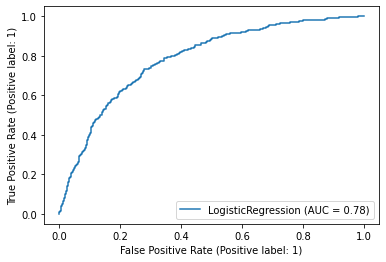

In [61]:
plot_roc_curve(model_lin, x_valid, y_valid)

In [62]:
print("roc_auc:", roc_auc_score(y_valid, y_pred))

roc_auc: 0.5458240455517057


In [63]:
grid = {'n_estimators': [3, 10, 30, 50, 100, 150],
                     'max_depth': range(5, 11)
                    }
model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(model, grid, cv=5,
                           scoring='f1'
                          )
grid_search.fit(X_down, y_down)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': range(5, 11),
                         'n_estimators': [3, 10, 30, 50, 100, 150]},
             scoring='f1')

In [64]:
grid_search.best_params_

{'max_depth': 8, 'n_estimators': 150}

In [65]:
model_fst = RandomForestClassifier(random_state=42, max_depth=8, n_estimators=150)
model_fst.fit(X_up, y_up)
y_pred = model_fst.predict(x_valid)
print("F1:", f1_score(y_valid, y_pred))

F1: 0.6168032786885246


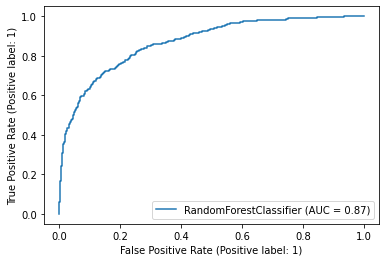

In [66]:
plot_roc_curve(model_fst, x_valid, y_valid)

In [67]:
print("roc_auc:", roc_auc_score(y_valid, y_pred))

roc_auc: 0.7818610959811177


downsampling показывает себя хуже 

### Вывод
* Наилучшим методоб борьбы себя показывает upsampling, тестировать будем на нем модель случайного леса с параметрами  max_depth=10, n_estimators=150

## Тестирование модели

In [68]:
model_fst = RandomForestClassifier(random_state=42, max_depth=10, n_estimators=150)
model_fst.fit(X_up, y_up)

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42)

In [69]:
y_pred = model_fst.predict(x_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print("precisison:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

accuracy: 0.828
precisison: 0.5477582846003899
recall: 0.7150127226463104
F1: 0.6203090507726269


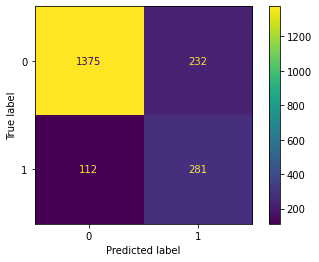

In [70]:
cm = confusion_matrix(y_test, y_pred, labels=model_fst.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_fst.classes_)
disp.plot()
plt.show()

In [71]:
probas = model_fst.predict_proba(x_test)[:,1]

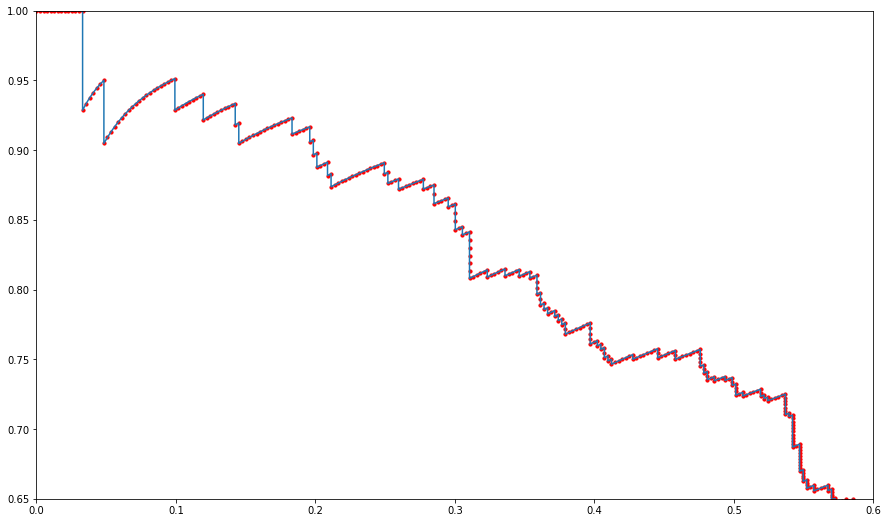

In [72]:
precision,recall,thresholds = precision_recall_curve(y_test,probas)

plt.figure(figsize=(15,12))
plt.plot(recall,precision)
plt.scatter(recall,precision, c='r', s=10)
plt.gca().set_aspect('equal')
plt.xlim([0.0, 0.6])
plt.ylim([0.65, 1])
plt.show()

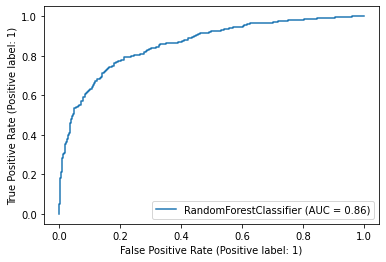

In [73]:
plot_roc_curve(model_fst, x_test, y_test)

In [74]:
print("roc_auc:", roc_auc_score(y_test, y_pred))

roc_auc: 0.7853221671725641


### Сравнение с случайной моделью и константной

In [75]:
y_pred = np.zeros_like(y_pred)
print("accuracy:", accuracy_score(y_test, y_pred))
print("precisison:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

accuracy: 0.8035
precisison: 0.0
recall: 0.0
F1: 0.0


In [76]:
y_pred = shuffle(y_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print("precisison:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

accuracy: 0.686
precisison: 0.2010178117048346
recall: 0.2010178117048346
F1: 0.2010178117048346


### Вывод
* Наилучшей показала себя модель случайного леса с параметрами 'max_depth': 10, 'n_estimators': 150
* accuracy модели выше чем у случайной и константной - 0.83 в сравнении 0.80 и 0.68
* f1 тоже выше - 0.62 в сравнении 0.00 и 0.17

## Вывод
* Исследован и обработан датасет
* Заполнены заглушками строки с пропущенными значениями `tenure`, которые носят случайный характер

* Построены модели без обработки дисбаланса и с обработкой различными методами, на которых показано, что модели, обученные на обработанных данных, имеют лучшее качество
* Определена наилучшая модель, для нее найдены наилучшие гиперпараметры методом кросс-валидации на upsample(increase=4) тренировочной выборке (модель случайного леса, 'max_depth': 8, 'n_estimators': 150)

* Достигнута f1-метрика на тестовой выборке 0.63, accuracy - 0.82, обе метрики значительно выше аналогичных для случайной модели
* Параметр roc_auc 0.79, что также выше чем у случайной модели